# Heart Disease Dataset


https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

### Context
>EUA

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

>BR

*Este conjunto de dados data de 1988 e consiste em quatro bancos de dados: Cleveland, Hungria, Suíça e Long Beach V. Ele contém 76 atributos, incluindo o atributo previsto, mas todos os experimentos publicados referem-se ao uso de um subconjunto de 14 deles. O campo "alvo" refere-se à presença de cardiopatia no paciente. É valor inteiro 0 = sem doença e 1 = doença.*



### Content
>EUA
* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* 
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

>BR
* idade
* sexo
* tipo de dor no peito (4 valores)
* pressão arterial em repouso
* colesterol sérico em mg/dl
* açúcar no sangue em jejum > 120 mg/dl
* resultados eletrocardiográficos em repouso (valores 0,1,2)
* frequência cardíaca máxima alcançada
* angina induzida por exercício
* oldpeak = depressão do segmento ST induzida pelo exercício em relação ao repouso
* a inclinação do pico do segmento ST do exercício
* número de vasos principais (0-3) coloridos por fluoroscopia
* tal: 0 = normal; 1 = defeito fixo; 2 = defeito reversível

Os nomes e números de CPF dos pacientes foram recentemente removidos do banco de dados, substituídos por valores fictícios.*

In [20]:
#importando libs

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Carregando dataframe
hd=pd.read_csv("heart.csv")

In [7]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
#verificando se tem algum valor nulo
hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
#verificando se tem duplicatas

hd.duplicated().sum()

723

In [12]:
#retirando duplicatas
hd=hd.drop_duplicates()

In [28]:
len(hd)

302

In [15]:
#analisando dados

hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

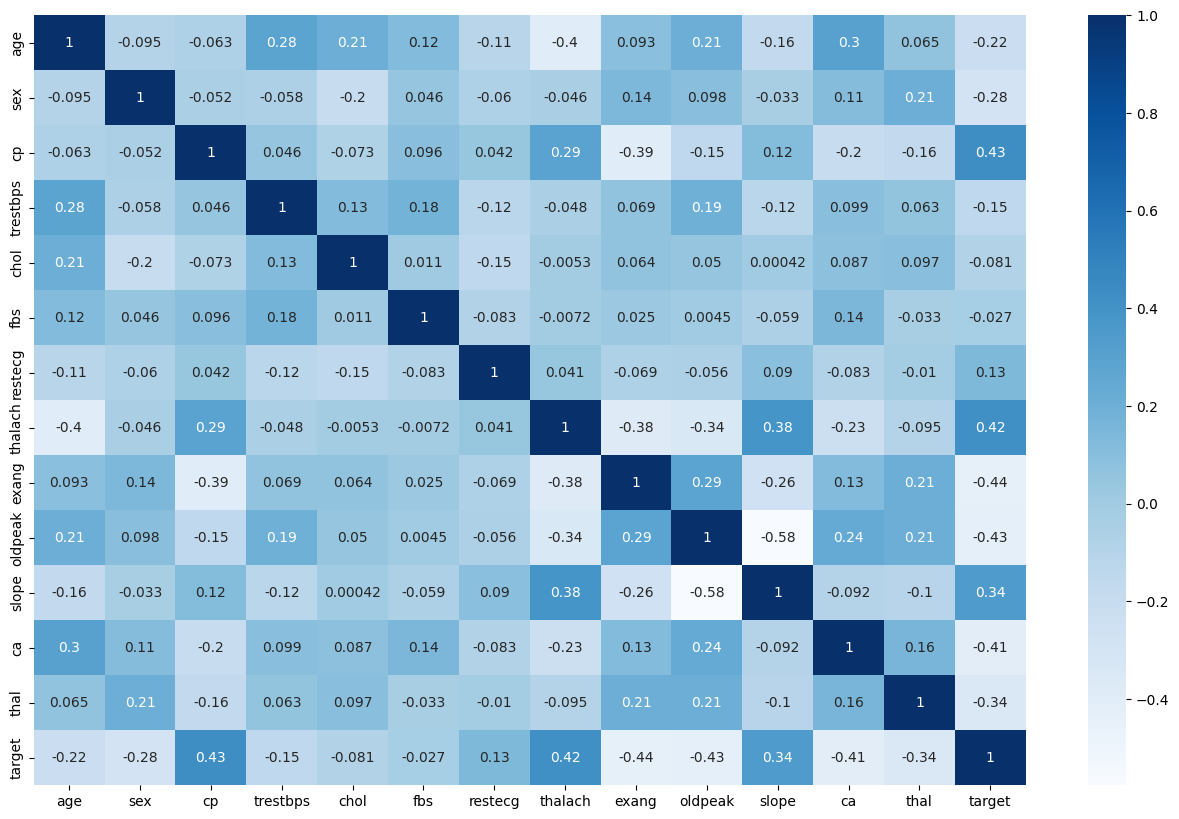

In [23]:
plt.figure(figsize=(16,10))
sns.heatmap(hd.corr(),annot=True,cmap="Blues")

In [30]:
#separando variaveis categoricas e nominais

for c in hd.columns:
    print(c)

t
t
t
t
t
t
t
t
t
t
t
t
t
t
